# 1. 패키지, 모듈, 클래스, 함수 불러오기

In [ ]:
# klib , missingno 패키지 (EDA 패키지)
# !pip install klib
# !pip install missingno

# # pycaret 패키지
# !pip install -upgrade matplotlib pandas seaborn tqdm requests
# # !pip install pycaret
# !pip install shap awscli azure-storage-blob google-cloud-storage psutil

# # 베이지안 최적화 optuna 패키지
# # !pip install optuna

# # catboost 모델 패키지
# !pip install catboost

# # tensorflow 패키지
# !pip install tensorflow

# # shap 패키지
# !pip install shap

# # 이미지 처리 패키지
# !install Pillow

# !pip install pydot


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u
     |████████████████████████████████| 564 kB 5.3 MB/s 
     |████████████████████████████████| 3.8 MB 88.3 MB/s 
     |████████████████████████████████| 356 kB 80.3 MB/s 
     |████████████████████████████████| 8.4 MB 61.8 MB/s 
     |████████████████████████████████| 547 kB 69.8 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 138 kB 74.2 MB/s 
     |████████████████████████████████| 178 kB 74.7 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 3.6 MB 61.9 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np
import pandas_profiling as pp
import gc

# Visualization, EDA
import missingno as msno
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Korean font
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# import optuna

# Modeling
from lightgbm import LGBMClassifier
# from pycaret.classification import *
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import *
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from keras.callbacks import ModelCheckpoint

# Utility
import re
import os
import time
import datetime
import random
import tensorflow as tf
import pickle
import joblib
import platform
import warnings; warnings.filterwarnings("ignore")
from itertools import combinations
from tqdm import tqdm, tqdm_notebook
from IPython.display import Image
from scipy.stats.mstats import gmean
from tensorflow import keras
from PIL import Image

In [ ]:
# 코랩에서만 경로 설정
# from google.colab import drive
# drive.mount('/content/drive')

# path = "/content/drive/MyDrive/ML Competition/input"

# panel = pd.read_csv(path + '/panel.csv', encoding = "utf-8")
# survey = pd.read_csv(path + '/survey.csv', encoding = "utf-8")
# response_train = pd.read_csv(path + '/response_train.csv', encoding = "utf-8")
# response_test = pd.read_csv(path + '/response_test.csv', encoding = "utf-8")
# sub = pd.read_csv(path + "/sample_submission.csv")

Mounted at /content/drive


# 2. 데이터 불러오기

In [ ]:
# 주피터 파일일때(주석처리)
panel = pd.read_csv(os.path.abspath("../input") + '/panel.csv')
survey = pd.read_csv(os.path.abspath("../input") + '/survey.csv')
response_train = pd.read_csv(os.path.abspath("../input") + '/response_train.csv')
response_test = pd.read_csv(os.path.abspath("../input") + '/response_test.csv')

# 성별, 지역 값이 Nan 값인 패널 1명 test에도 존재 하지 않아 그냥 drop
panel.drop(8315, axis=0, inplace=True)
# REGION 컬럼 무의미해서 drop
panel.drop(['REGION'], axis=1, inplace=True)


# 3. Feature Create

##### (패널 질문 응답수)

In [ ]:
# 패널 질문 COUNT(질문의 성의 판단)
panel_Questions = panel.iloc[:,4:]

panel = panel.iloc[:,:4]
panel_Questions_count = []
for i in range(panel_Questions.shape[0]):
            panel_Questions_count.append(pd.notna(panel_Questions.iloc[i,:].values).sum())

# 패널 질문 응답수
panel['Questions_count'] = panel_Questions_count

train = response_train.merge(panel).merge(survey)
test = response_test.merge(panel).merge(survey).sort_values(by='ID')

##### (패널 ID별 누적 포인트)

In [ ]:
# 패널 ID 별 획득 누적 포인트
Points_earned = pd.DataFrame(train.query('STATUS==1').groupby('userID')['CPI'].agg([('Points_earned',np.sum)])).reset_index()

# 패널 ID 별 획득 평균 포인트
Points_earned_mean = pd.DataFrame(train.query('STATUS==1').groupby('userID')['CPI'].agg([('Points_earned_mean',np.mean)])).reset_index()

train = train.merge(Points_earned, how='left')
train = train.merge(Points_earned_mean, how='left')

train['Points_earned'].fillna(0, inplace = True)
train['Points_earned_mean'].fillna(0, inplace = True)

test = test.merge(Points_earned, how='left')
test = test.merge(Points_earned_mean, how='left')

test['Points_earned'].fillna(0, inplace = True)
test['Points_earned_mean'].fillna(0, inplace = True)

##### (일자, 요일, 시간)

In [ ]:
data = [train, test]

for i in data:
    i['TIME'] = i['TIME'].astype("datetime64")
    
    i['DAY'] = i['TIME'].dt.day

    i["MONTH"] = i["TIME"].dt.month
    
    i['WEEKDAY'] = i['TIME'].dt.dayofweek
    
    i['HOUR'] = i['TIME'].dt.hour
    

##### (TITLE / CATEGORIES 빈도수)

In [ ]:
# [^ ㄱ-ㅣ가-힣] 정규 표현식
# 다소 시간이 오래 걸림
word_counts = {}
def count_word(x):
    if x['STATUS'] == 1:
        for w in re.sub(r'[^ ㄱ-ㅣ가-힣]', '', x['TITLE']).split():
            word_counts[w] = word_counts.get(w, 0) + 1
def score_word(x):
    score = 0
    for w in re.sub(r'[^ ㄱ-ㅣ가-힣]', '', x['TITLE']).split():
        score += word_counts.get(w, 0)
    return score    
            
train.apply(count_word, axis=1)
train.TITLE = train.apply(score_word, axis=1)
test.TITLE = test.apply(score_word, axis=1)

In [ ]:
train["CATEGORIES_CNT"]=0
test["CATEGORIES_CNT"]=0

train["CATEGORIES"]=train["CATEGORIES"].fillna("unknown")
test["CATEGORIES"]=test["CATEGORIES"].fillna("unknown")
word_counts = {}
def count_word(x):
    if x['STATUS'] == 1:
        for w in re.sub(r'[^a-zA-Z]', '', x['CATEGORIES']).split():
            word_counts[w] = word_counts.get(w, 0) + 1
def score_word(x):
    score = 0
    for w in re.sub(r'[^a-zA-Z]', '', x['CATEGORIES']).split():
        score += word_counts.get(w, 0)
    return score    
            
train.apply(count_word, axis=1)
train.CATEGORIES_CNT = train.apply(score_word, axis=1)
test.CATEGORIES_CNT = test.apply(score_word, axis=1)


##### IR 별 응답확률

In [ ]:
train_IR = ((train.groupby('IR')['STATUS'].sum())/(train.IR.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_IR'})
train = train.merge(train_IR,how='left')
test = test.merge(train_IR,how='left')
test.STATUS_ratio_IR=test.STATUS_ratio_IR.fillna(test.STATUS_ratio_IR.mean())

##### LOI별 응답확률

In [ ]:
train_LOI = ((train.groupby('LOI')['STATUS'].sum())/(train.LOI.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_LOI'})
train = train.merge(train_LOI,how='left')
test = test.merge(train_LOI,how='left')
test.STATUS_ratio_LOI=test.STATUS_ratio_LOI.fillna(test.STATUS_ratio_LOI.mean())

##### CPI 별 응답확률

In [ ]:
train_CPI = ((train.groupby('CPI')['STATUS'].sum())/(train.CPI.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_CPI'})
train = train.merge(train_CPI,how='left')
test = test.merge(train_CPI,how='left')
test.STATUS_ratio_CPI=test.STATUS_ratio_CPI.fillna(test.STATUS_ratio_CPI.mean())

##### (TYPE 별 응답확률)

In [ ]:
TYPE_mean = pd.DataFrame(train.groupby('TYPE')['STATUS'].agg([('TYPE_mean',np.mean)])).reset_index()
train = train.merge(TYPE_mean, how='left')
test = test.merge(TYPE_mean, how='left')

##### (유저 아이디 별 응답확률)

In [ ]:
respond = train.query('STATUS == 1').groupby('userID')['userID'].agg([('respond',np.size)]).reset_index()
total = train.groupby('userID')['userID'].agg([('total',np.size)]).reset_index()

train = train.merge(respond).merge(total)

train['Response_Probability'] = train['respond'] / train['total']
test = pd.merge(test, train.drop_duplicates(subset=['userID'])[['userID', 'Response_Probability']], how='left')
test['Response_Probability'] = test['Response_Probability'].fillna(0) 

del train['respond'], train['total']

##### 시간별 응답확률

In [ ]:
hour_mean = train.groupby("HOUR").STATUS.mean()
train["STATUS_ratio_hour"] = train["HOUR"].map(dict(hour_mean))
test["STATUS_ratio_hour"] = test["HOUR"].map(dict(hour_mean))

##### 유저아이디별 응답횟수

In [ ]:
res_cnt = train[train.STATUS== 1].groupby("userID").surveyID.count()
train["res_cnt"] = train["userID"].map(dict(res_cnt))
test["res_cnt"] = test["userID"].map(dict(res_cnt))

test["res_cnt"] = test["res_cnt"].fillna(0)

##### CATEGORIES Label encoding

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(train["CATEGORIES"])
train_encoded_cat = encoder.transform(train["CATEGORIES"])

# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 
for label in np.unique(test["CATEGORIES"]):
    if label not in encoder.classes_: # unseen label 데이터인 경우( )
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
test_encoded_cat = encoder.transform(test["CATEGORIES"])

train["CATEGORIES"] = pd.DataFrame(train_encoded_cat)
test["CATEGORIES"] = pd.DataFrame(test_encoded_cat)

del train_encoded_cat, test_encoded_cat

##### 시간별 응답확률

In [ ]:
weekday_mean = train.groupby("WEEKDAY").STATUS.mean()
train["weekday_mean"] = train["WEEKDAY"].map(dict(weekday_mean))
test["weekday_mean"] = test["WEEKDAY"].map(dict(weekday_mean))

##### 성별응답확률

In [ ]:
res_freq = train.query('STATUS == 1').groupby('GENDER')['IR'].agg([('g_i','mean')]).reset_index()
train = pd.merge(train, res_freq, how='left')
test = pd.merge(test, res_freq, how='left')
test.FREQ = test.g_i.fillna(test.g_i.mean())

##### 생년 -> 나이

In [ ]:
train["AGE"] = 2022- train["BIRTH"]
test["AGE"] = 2022- test["BIRTH"]

# 4. Feature Engineering

##### 2021년 2월 10 일 데이터만 사용

In [ ]:
train = train[train.TIME >= "2021-02-20 00:00:00"]

##### 무의미한 feature 삭제

In [ ]:
y_train = train['STATUS']
train.drop(['STATUS','userID', 'surveyID', 'TIME',"BIRTH"], axis=1, inplace=True)

test_id = test.iloc[:,0:1]
test.drop(['ID','userID', 'surveyID', 'TIME',"BIRTH"], axis=1, inplace=True)


##### Feature 전처리

In [ ]:
# train, test 병합 후 결측값 처리
features = pd.concat([train, test]).reset_index(drop=True)

features = features.astype({'GENDER':'object'})

cat = features.select_dtypes(include=['object','category']).columns.to_list()# 범주형 변수
num = features.select_dtypes(exclude=['object','category']).columns.to_list()# 수치형 변수

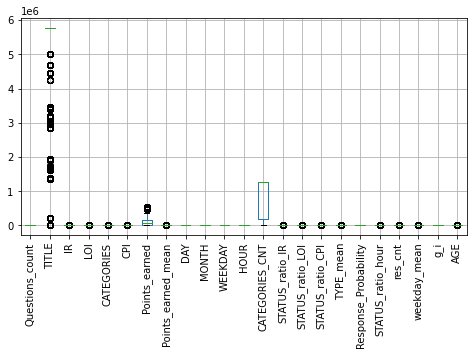

In [ ]:
# 이상치 제거 전 수치형 변수 시각화
plt.figure(figsize = (8, 4))
features[num].boxplot()
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [ ]:
# 수치형 변수 이상치 제거
features[num] = features[num].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 이상치 제거 후 수치형 변수 시각화
plt.figure(figsize = (8, 4))
features[num].boxplot()
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

# 스케일링 전 train, test 분할
X_train = features.iloc[:y_train.shape[0], :]
X_test = features.iloc[y_train.shape[0]:, :]

scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [ ]:
# 원핫 인코딩
df_encoded = pd.get_dummies(pd.concat([X_train, X_test]), columns=cat)
X_train = df_encoded[:X_train.shape[0]]
X_test = df_encoded[X_train.shape[0]:]

# 5. 피쳐 셀렉션

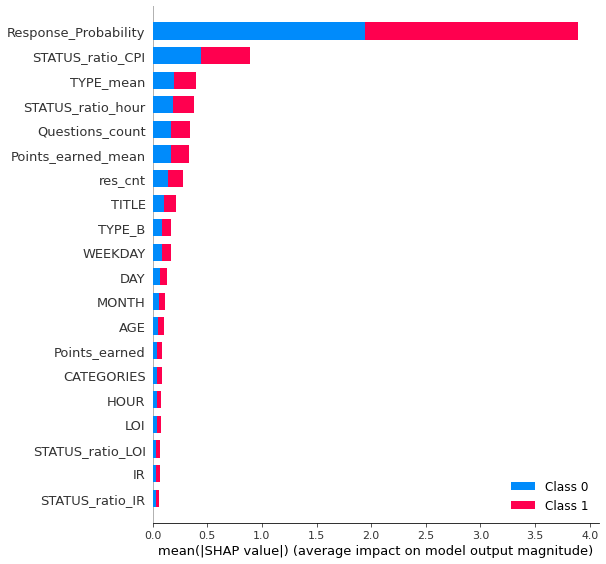

,column_name,shap_importance
17,Response_Probability,1.94549
15,STATUS_ratio_CPI,0.444716
16,TYPE_mean,0.199317
18,STATUS_ratio_hour,0.19009
0,Questions_count,0.170035
7,Points_earned_mean,0.166691
19,res_cnt,0.137363
1,TITLE,0.107737
25,TYPE_B,0.0845935
10,WEEKDAY,0.0837425


In [ ]:
# Method: Using SHAP values 
import shap
from lightgbm import LGBMClassifier

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
model = LGBMClassifier(random_state=0).fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=1)[1,:]
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# feature 중요도가 0 이상
SHAP_THRESHOLD = 0
features_selected = importance_df.query('shap_importance > @SHAP_THRESHOLD').column_name.tolist()
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape)

(1169378, 24)


# LGBM OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LGBMClassifier(random_state = 44)
lgbm_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    lgbm_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')


LGBMClassifier의 5fold 평균 AUC는 0.9223206925452352


In [ ]:
sub["STATUS"] = lgbm_pred
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

# CatBoost OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = CatBoostClassifier(random_state = 44)
cat_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    cat_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 0.4025739	total: 159ms	remaining: 26.4s
6:	learn: 0.3963854	total: 183ms	remaining: 26s
7:	learn: 0.3917151	total: 210ms	remaining: 26s
8:	learn: 0.3883038	total: 234ms	remaining: 25.8s
9:	learn: 0.3843647	total: 260ms	remaining: 25.7s
10:	learn: 0.3810723	total: 284ms	remaining: 25.5s
11:	learn: 0.3786213	total: 310ms	remaining: 25.5s
12:	learn: 0.3760373	total: 336ms	remaining: 25.5s
13:	learn: 0.3748580	total: 361ms	remaining: 25.5s
14:	learn: 0.3730007	total: 387ms	remaining: 25.4s
15:	learn: 0.3721109	total: 410ms	remaining: 25.2s
16:	learn: 0.3704634	total: 436ms	remaining: 25.2s
17:	learn: 0.3691766	total: 461ms	remaining: 25.1s
18:	learn: 0.3683590	total: 485ms	remaining: 25s
19:	learn: 0.3672341	total: 510ms	remaining: 25s
20:	learn: 0.3664257	total: 536ms	remaining: 25s
21:	learn: 0.3654867	total: 561ms	remaining: 24.9s
22:	learn: 0.3647884	total: 585ms	remaining: 24.9s
23:	learn: 0.3640708	total: 612ms	remaining: 24.9s
24:	learn:

In [ ]:
sub["STATUS"] = cat_pred/2
sub.to_csv(os.path.abspath("../submissions") +"/.csv", index = False)

# RF OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = RandomForestClassifier(random_state = 44)
rf_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    rf_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')

RandomForestClassifier의 5fold 평균 AUC는 0.9343858046955988


In [ ]:
sub["STATUS"] = (rf_pred + cat_pred)/2
sub.to_csv(os.path.abspath("../submissions") + "/best_all_train_feb20.csv", index = False)